In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import requests

# load twitter archive csv file into a dataframe
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')


url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open('image-predictions.tsv', 'wb') as f:
    f.write(response.content)

image_predictions = pd.read_csv('image-predictions.tsv', sep='\t')


# open the tweet json file in read mode with utf-8 encoding
with open('tweet-json.txt','r',encoding='utf-8') as f:

#print the first five lines of the file
  for i in range (5):
    repr(f.readline())

# **Data Assesing**

In [91]:
# show the first five lines of the dataframe
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,NaN,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,NaN,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,NaN,NaN


In [92]:
# show the size of the table (rows , columns)
twitter_archive.shape

(2356, 17)

In [93]:
# show the basic info of the table (columns , data types , missing values)
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        1611 non-null   object 
 13  doggo                       97 no

In [94]:
# show the data type of each column
print(twitter_archive.dtypes)

tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object


In [95]:
# show summary statistics for the numeric columns
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [96]:
# show the sum of the missing values in each column
twitter_archive.isnull().sum()

,0
tweet_id,0
in_reply_to_status_id,2278
in_reply_to_user_id,2278
timestamp,0
source,0
text,0
retweeted_status_id,2175
retweeted_status_user_id,2175
retweeted_status_timestamp,2175
expanded_urls,59


In [97]:
#check the data type of timestamp column
twitter_archive['timestamp'].dtypes

dtype('O')

In [99]:
# show the first 5 lines of columns ('doggo',	'floofer'	, 'pupper'	, 'puppo')
twitter_archive[['doggo',	'floofer'	, 'pupper'	, 'puppo']].head()

,doggo,floofer,pupper,puppo
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN


In [100]:
# count how many duplicate rows are in the table
twitter_archive.duplicated().sum()

np.int64(0)

In [101]:
# Show how many times each rating numerator appears
twitter_archive["rating_numerator"].value_counts()

# Show how many times each rating denominator appears
twitter_archive["rating_denominator"].value_counts()

,count
rating_denominator,
10,2333
11,3
50,3
20,2
80,2
0,1
7,1
70,1
170,1


In [102]:
# check counts of names of dog stages

print(twitter_archive["name"].value_counts())
print(twitter_archive["doggo"].value_counts())
print(twitter_archive["floofer"].value_counts())
print(twitter_archive["pupper"].value_counts())
print(twitter_archive["puppo"].value_counts())

name
a               55
Charlie         12
Oliver          11
Cooper          11
Lucy            11
                ..
Jaycob           1
Jeremy           1
Chaz             1
Skittles         1
Cleopatricia     1
Name: count, Length: 956, dtype: int64
doggo
doggo    97
Name: count, dtype: int64
floofer
floofer    10
Name: count, dtype: int64
pupper
pupper    257
Name: count, dtype: int64
puppo
puppo    30
Name: count, dtype: int64


In [103]:
print(twitter_archive.columns)

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')


#Define
**There are several quality and tidiness issues in the twitter_archive DataFrame**

# **Quality issues:**

*   **The  ' timestamp ' stored as string instead of datatime**
*   **Some tweets have unusual ratings**
*   **Some columns contain many missing values**
*   **the 'tweet_id' is stored as an int64 , even though int64 is not suitable for an id**

#**Tidiness issues:**

*  **The columns ' doggo ,	floofer	, pupper , puppo ' should combine in one column**


# **Data Cleaning**

#Code :

In [115]:
twitter_archive_clean = twitter_archive.copy()

# Check if stage columns exist
print(twitter_archive_clean.columns)

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')


In [105]:
twitter_archive_clean = twitter_archive_clean[~twitter_archive_clean['text'].str.startswith('RT @')]

In [106]:
# Change 'timestamp' column to datetime format
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean['timestamp'])

In [107]:
# keep only rows where rating denominator = 10
twitter_archive = twitter_archive[twitter_archive['rating_denominator'] == 10]

In [108]:
# keep only rows where rating numerator is equal to or smaller than 20
twitter_archive = twitter_archive[twitter_archive['rating_numerator'] <= 20]

In [109]:
# fill the missing values with None
twitter_archive = twitter_archive.fillna('None')

In [110]:
# change tweet_id column to string type
twitter_archive['tweet_id'] = twitter_archive['tweet_id'].astype(str)

In [116]:
# Replace the string 'None' with empty strings in dog stage columns
twitter_archive_clean['doggo'] = twitter_archive_clean['doggo'].replace('None', '')
twitter_archive_clean['floofer'] = twitter_archive_clean['floofer'].replace('None', '')
twitter_archive_clean['pupper'] = twitter_archive_clean['pupper'].replace('None', '')
twitter_archive_clean['puppo'] = twitter_archive_clean['puppo'].replace('None', '')

# Combine the dog stage columns into one column
twitter_archive_clean['dog_stage'] = (
    twitter_archive_clean['doggo'] +
    twitter_archive_clean['floofer'] +
    twitter_archive_clean['pupper'] +
    twitter_archive_clean['puppo']
)

# Replace any empty string with NaN
twitter_archive_clean['dog_stage'] = twitter_archive_clean['dog_stage'].replace('', pd.NA)

# Drop the original columns
twitter_archive_clean = twitter_archive_clean.drop(columns=['doggo', 'floofer', 'pupper', 'puppo'])

# Check value counts
print(twitter_archive_clean['dog_stage'].value_counts())


dog_stage
pupper          244
doggo            83
puppo            29
doggopupper      12
floofer           9
doggopuppo        1
doggofloofer      1
Name: count, dtype: int64


In [120]:
twitter_archive_clean.loc[twitter_archive_clean['dog_stage'] == 'doggopupper', 'dog_stage'] = 'doggo, pupper'
twitter_archive_clean.loc[twitter_archive_clean['dog_stage'] == 'doggopuppo', 'dog_stage'] = 'doggo, puppo'
twitter_archive_clean.loc[twitter_archive_clean['dog_stage'] == 'doggofloofer', 'dog_stage'] = 'doggo, floofer'
twitter_archive_clean.loc[twitter_archive_clean['dog_stage'] == 'NoneNoneNoneNone', 'dog_stage'] = pd.NA

In [121]:
print(twitter_archive_clean.columns)

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'dog_stage'],
      dtype='object')


# Test :

In [122]:
# Confirm timestamp is now datetime
print(twitter_archive_clean['timestamp'].dtypes)

# Confirm no odd ratings
print(twitter_archive_clean['rating_denominator'].value_counts())
print(twitter_archive_clean['rating_numerator'].describe())

# Confirm tweet_id is string
print(twitter_archive_clean['tweet_id'].dtype)

# Check dog_stage column
print(twitter_archive_clean[['tweet_id', 'dog_stage']].head())

# Check if original stage columns are dropped
print(twitter_archive_clean.columns)


object
rating_denominator
10    2324
Name: count, dtype: int64
count    2324.000000
mean       10.706971
std         2.179765
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max        17.000000
Name: rating_numerator, dtype: float64
object
             tweet_id dog_stage
0  892420643555336193      <NA>
1  892177421306343426      <NA>
2  891815181378084864      <NA>
3  891689557279858688      <NA>
4  891327558926688256      <NA>
Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'dog_stage'],
      dtype='object')


In [24]:
twitter_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN


# Data Assesing

In [25]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [26]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [27]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [28]:
image_predictions.isnull().sum()

,0
tweet_id,0
jpg_url,0
img_num,0
p1,0
p1_conf,0
p1_dog,0
p2,0
p2_conf,0
p2_dog,0
p3,0


In [29]:
image_predictions.duplicated().sum()

np.int64(0)

In [30]:
# Show the top 10 most common predicted dog breeds (p1 column)
image_predictions['p1'].value_counts().head(10)

,count
p1,
golden_retriever,150
Labrador_retriever,100
Pembroke,89
Chihuahua,83
pug,57
chow,44
Samoyed,43
toy_poodle,39
Pomeranian,38


In [31]:
# Show all unique values in the p1 column
unique_p1 = image_predictions['p1'].unique()
print(unique_p1)

['Welsh_springer_spaniel' 'redbone' 'German_shepherd'
 'Rhodesian_ridgeback' 'miniature_pinscher' 'Bernese_mountain_dog'
 'box_turtle' 'chow' 'shopping_cart' 'miniature_poodle' 'golden_retriever'
 'Gordon_setter' 'Walker_hound' 'pug' 'bloodhound' 'Lhasa'
 'English_setter' 'hen' 'desktop_computer' 'Italian_greyhound'
 'Maltese_dog' 'three-toed_sloth' 'ox' 'malamute' 'guinea_pig'
 'soft-coated_wheaten_terrier' 'Chihuahua' 'black-and-tan_coonhound'
 'coho' 'toy_terrier' 'Blenheim_spaniel' 'Pembroke' 'llama'
 'Chesapeake_Bay_retriever' 'curly-coated_retriever' 'dalmatian'
 'Ibizan_hound' 'Border_collie' 'Labrador_retriever' 'seat_belt' 'snail'
 'miniature_schnauzer' 'Airedale' 'triceratops' 'swab' 'hay' 'hyena'
 'jigsaw_puzzle' 'West_Highland_white_terrier' 'toy_poodle'
 'giant_schnauzer' 'vizsla' 'vacuum' 'Rottweiler' 'Siberian_husky' 'teddy'
 'papillon' 'Saint_Bernard' 'porcupine' 'goose' 'Tibetan_terrier' 'borzoi'
 'beagle' 'hare' 'Yorkshire_terrier' 'Pomeranian' 'electric_fan'
 'web_si

In [32]:
unique_p2 = image_predictions['p2'].unique()
print(unique_p2)

['collie' 'miniature_pinscher' 'malinois' 'redbone' 'Rottweiler'
 'English_springer' 'mud_turtle' 'Tibetan_mastiff' 'shopping_basket'
 'komondor' 'Yorkshire_terrier' 'English_foxhound' 'bull_mastiff'
 'German_shepherd' 'Shih-Tzu' 'Newfoundland' 'cock' 'desk' 'toy_terrier'
 'toy_poodle' 'otter' 'Chesapeake_Bay_retriever' 'Siberian_husky' 'skunk'
 'Afghan_hound' 'bloodhound' 'barracouta' 'papillon' 'cocker_spaniel'
 'chow' 'Irish_terrier' 'chain_saw' 'beagle' 'giant_schnauzer'
 'Labrador_retriever' 'Pembroke' 'Chihuahua' 'Weimaraner' 'slug'
 'Brittany_spaniel' 'standard_schnauzer' 'teddy' 'armadillo'
 'African_hunting_dog' 'vizsla' 'doormat' 'pug' 'Italian_greyhound'
 'Samoyed' 'Pomeranian' 'miniature_poodle' 'Lakeland_terrier'
 'Irish_setter' 'swab' 'malamute' 'bath_towel' 'Border_collie' 'Leonberg'
 'drake' 'French_bulldog' 'ice_bear' 'Christmas_stocking'
 'golden_retriever' 'standard_poodle' 'dhole' 'kuvasz' 'Cardigan'
 'silky_terrier' 'spotlight' 'dishwasher' 'bighorn' 'tow_truck'
 '

In [34]:
unique_p3 = image_predictions['p3'].unique()
print(unique_p3)

['Shetland_sheepdog' 'Rhodesian_ridgeback' 'bloodhound'
 'miniature_pinscher' 'Doberman' 'Greater_Swiss_Mountain_dog' 'terrapin'
 'fur_coat' 'golden_retriever' 'soft-coated_wheaten_terrier'
 'Labrador_retriever' 'Pekinese' 'Ibizan_hound' 'French_bulldog'
 'malinois' 'Dandie_Dinmont' 'borzoi' 'partridge' 'bookcase' 'basenji'
 'miniature_poodle' 'great_grey_owl' 'groenendael' 'Eskimo_dog' 'hamster'
 'briard' 'papillon' 'flat-coated_retriever' 'gar' 'Chihuahua' 'Shih-Tzu'
 'Pomeranian' 'dingo' 'power_drill' 'Saluki' 'Great_Pyrenees'
 'West_Highland_white_terrier' 'collie' 'toy_poodle' 'vizsla' 'acorn'
 'giant_schnauzer' 'teddy' 'common_iguana' 'wig' 'water_buffalo' 'coyote'
 'seat_belt' 'kelpie' 'space_heater' 'Brabancon_griffon' 'standard_poodle'
 'beagle' 'Irish_water_spaniel' 'bluetick' 'Weimaraner'
 'Chesapeake_Bay_retriever' 'toilet_tissue' 'black-and-tan_coonhound'
 'kuvasz' 'Christmas_stocking' 'badger' 'hen' 'Staffordshire_bullterrier'
 'Yorkshire_terrier' 'Lakeland_terrier' 'weas

In [35]:
uniqe_img_num = image_predictions['img_num'].unique()
print(uniqe_img_num)

[1 4 2 3]


#Define
**There are three main issues in the image_predictions DataFrame**

# Quality issues:

*  **Columns (p1 , p2 , p3) have underscores instead of spaces**  
*  **Columns (p1 , p2 , p3) have false dog breeds**
*  **the 'tweet_id' is stored as an int64 , even though int64 is not suitable for an id**

#Tidiness issues:

*   **Columns (p1 , p2 , p3) have the same kind of information**

# Data Cleaning

#Code :

In [36]:
# Make a copy of the original image_predictions DataFrame
image_predictions_clean = image_predictions.copy()

In [37]:
# Replace underscores with spaces in predicted breed names (p1, p2, p3)

image_predictions['p1'] = image_predictions['p1'].str.replace('_', ' ')
image_predictions['p2'] = image_predictions['p2'].str.replace('_', ' ')
image_predictions['p3'] = image_predictions['p3'].str.replace('_', ' ')

In [38]:
image_predictions['tweet_id'] = image_predictions['tweet_id'].astype(str)

In [40]:
# Rename columns and make the table longer
image_predictions = image_predictions.rename(columns={
    'p1': 'p_1', 'p2': 'p_2', 'p3': 'p_3',
    'p1_conf': 'p_conf_1', 'p2_conf': 'p_conf_2', 'p3_conf': 'p_conf_3',
    'p1_dog': 'p_dog_1', 'p2_dog': 'p_dog_2', 'p3_dog': 'p_dog_3'
})

df_long = pd.wide_to_long(image_predictions,
    stubnames = ['p','p_conf','p_dog'],
    i=['tweet_id','jpg_url','img_num'],
    j='prediction_rank',
    sep='_',
    suffix='[123]').reset_index()

In [41]:
# keep only rows where the prediction is a dog
df_long = df_long[df_long['p_dog'] == True]

#Test :

In [42]:
# Confirm tweet_id is string
print(image_predictions_clean['tweet_id'].dtype)

# Confirm long table shape and structure
print(df_long.head())
print(df_long.shape)
print(df_long['p_dog'].unique())  # Should only show True

int64
             tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
2  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
3  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
4  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   

   img_num  prediction_rank                       p    p_conf  p_dog  
0        1                1  Welsh springer spaniel  0.465074   True  
1        1                2                  collie  0.156665   True  
2        1                3       Shetland sheepdog  0.061428   True  
3        1                1                 redbone  0.506826   True  
4        1                2      miniature pinscher  0.074192   True  
(4584, 7)
[ True]


In [43]:
# Read tweet JSON data line by line and create a table with tweet_id, retweet_count, and favorite_count

tweet_data = []

with open('tweet-json.txt', 'r') as file:
  for line in file:
    if line.strip():
      try:
          tweet = json.loads(line)
          tweet_data.append({
              'tweet_id': tweet['id_str']
              , 'retweet_count': tweet['retweet_count']
              , 'favorite_count': tweet.get('favorite_count', 0)
          })

      except json.JSONDecodeError:
        print("Skipped a bad line")


tweet_df = pd.DataFrame(tweet_data)
tweet_df.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


# Data Assessing

In [44]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   object
 1   retweet_count   2354 non-null   int64 
 2   favorite_count  2354 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 55.3+ KB


In [45]:
tweet_df.dtypes

,0
tweet_id,object
retweet_count,int64
favorite_count,int64


In [46]:
tweet_df.describe()

,retweet_count,favorite_count
count,2354.000000,2354.000000
mean,3164.797366,8080.968564
std,5284.770364,11814.771334
min,0.000000,0.000000
25%,624.500000,1415.000000
50%,1473.500000,3603.500000
75%,3652.000000,10122.250000
max,79515.000000,132810.000000


In [47]:
tweet_df.isnull().sum()

,0
tweet_id,0
retweet_count,0
favorite_count,0


In [48]:
tweet_df.duplicated().sum()

np.int64(0)

In [49]:
# Check if there are any tweets with 0 likes
(tweet_df['favorite_count'] == 0).any()

np.True_

In [50]:
# Count how many tweets have 0 likes
(tweet_df['favorite_count'] == 0).sum()

np.int64(179)

#Define :


# Quality issues:



*   **some tweets its favorite_count = 0 , that may be invalid or missing**
# Tidness issues:


*   **There are no tidness issues**




# Data cleaning:

# Code :

In [51]:
tweet_df_clean = tweet_df.copy()

In [52]:
# Keep only tweets that have more than 0 likes
tweet_df = tweet_df[tweet_df['favorite_count'] > 0 ]

# Test :

In [53]:
# Confirm there are no tweets with 0 likes
(tweet_df['favorite_count'] == 0).any()

np.False_

In [54]:
twitter_archive_clean['tweet_id'] = twitter_archive_clean['tweet_id'].astype(str)
tweet_df['tweet_id'] = tweet_df['tweet_id'].astype(str)
df_long['tweet_id'] = df_long['tweet_id'].astype(str)

In [55]:
twitter_archive_clean = twitter_archive_clean.drop_duplicates(subset='tweet_id')
tweet_df = tweet_df.drop_duplicates(subset='tweet_id')
df_long = df_long.drop_duplicates(subset='tweet_id')

In [56]:
common_ids = set(twitter_archive_clean['tweet_id']) & set(tweet_df['tweet_id']) & set(df_long['tweet_id'])

In [57]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['tweet_id'].isin(common_ids)]
tweet_df = tweet_df[tweet_df['tweet_id'].isin(common_ids)]
df_long = df_long[df_long['tweet_id'].isin(common_ids)]

In [58]:
merged_df = twitter_archive_clean.merge(tweet_df, on='tweet_id', how='inner')
final_df = merged_df.merge(df_long, on='tweet_id', how='inner')

In [59]:
final_df.shape

(1686, 22)

In [60]:
final_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,name,dog_stage,retweet_count,favorite_count,jpg_url,img_num,prediction_rank,p,p_conf,p_dog
0,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,Tilly,NaN,6514,33819,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,1,Chihuahua,0.323581,True
1,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,Archie,NaN,4328,25461,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,1,Chihuahua,0.716012,True
2,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,Darla,NaN,8964,42908,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,2,Labrador retriever,0.168086,True
3,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,Franklin,NaN,9774,41048,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,1,basset,0.555712,True
4,891087950875897856,NaN,NaN,2017-07-29 00:08:17+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,...,NaN,NaN,3261,20562,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,1,Chesapeake Bay retriever,0.425595,True


# Storing data

In [129]:
# save the final cleaned data to a csv file
final_df.to_csv('twitter_archive_master.csv', index=False)

# Analyzing and Visualizing Data

In [130]:
twitter_archive_master = pd.read_csv('twitter_archive_master.csv')

In [126]:
# Count how many times each dog stage appears in the dataset
pupper_count = twitter_archive_clean['dog_stage'].astype(str).str.contains('pupper').sum()
doggo_count = twitter_archive_clean['dog_stage'].astype(str).str.contains('doggo').sum()
puppo_count = twitter_archive_clean['dog_stage'].astype(str).str.contains('puppo').sum()
floofer_count = twitter_archive_clean['dog_stage'].astype(str).str.contains('floofer').sum()

print("pupper_count:", pupper_count)
print("doggo_count:", doggo_count)
print("puppo_count:", puppo_count)
print("floofer_count:", floofer_count)


pupper_count: 256
doggo_count: 97
puppo_count: 30
floofer_count: 10


**Insight 1:**
The most common dog stage is pupper , followed by doggo

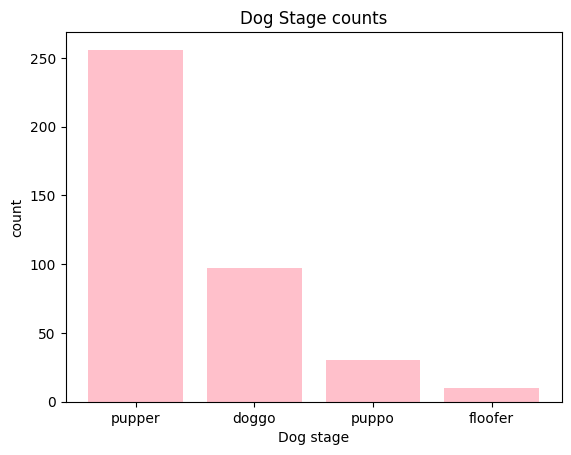

In [123]:
# Create a bar chart showing the count of each dog stage
stages  = ['pupper' , 'doggo' , 'puppo' , 'floofer']
counts = [pupper_count , doggo_count , puppo_count , floofer_count]

plt.bar(stages , counts , color='pink')
plt.title('Dog Stage counts')
plt.xlabel('Dog stage')
plt.ylabel('count')
plt.show()

In [65]:
# Show how many tweets came from each source
twitter_archive_master['source'].value_counts()

,count
source,
"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",1655
"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",22
"<a href=""https://about.twitter.com/products/tweetdeck"" rel=""nofollow"">TweetDeck</a>",9


**Insight 2:**

I looked at the source column to see where tweets came from.
Most tweets were posted using Twitter for iPhone

In [66]:
# get the total number of tweets in the dataset
total_tweets = twitter_archive_master.shape[0]
print("total_tweets:", total_tweets)

total_tweets: 1686


**Insight 3:**

I calculated the number of tweets in the dataset , there are [1686] tweet in the dataset